In [1]:
import os
_DF_DIR = os.path.join('..', '..', 'df_files')

import sys
sys.path.append('..')
import plotconfig

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from scipy import stats
import pandas as pd
import numpy as np

In [3]:
dbf1 = os.path.join(_DF_DIR, 'results.parquet')
df1 = pd.read_parquet(dbf1, engine='pyarrow')

mask1 = ((df1['method_name'] != "SVR") &
        (df1['method_name'] != "MLP") &
        (df1['method_name'] != "RandomForest") &
        (df1['eeg_name'] == "EEG_Raw") & 
        (df1['training_size'] == plotconfig.N_FOR_PERF_SCORE_COMPARISON) & 
        (df1['test_name'] == "random"))

In [4]:
dbf2 = os.path.join(_DF_DIR, 'results_cluster.parquet')
df2 = pd.read_parquet(dbf2, engine='pyarrow')

mask2 = ((df2['eeg_name'] == "EEG_Raw") & 
        (df2['training_size'] == plotconfig.N_FOR_PERF_SCORE_COMPARISON) & 
        (df2['test_name'] == "random"))

In [5]:
dbf3 = os.path.join(_DF_DIR, 'results_best.parquet')
df3 = pd.read_parquet(dbf3, engine='pyarrow')

mask3 = ((df3['eeg_name'] == "EEG_Raw") & 
        (df3['training_size'] == plotconfig.N_FOR_PERF_SCORE_COMPARISON) & 
        (df3['test_name'] == "random"))

In [6]:
np.unique(df2[df2["method_name"] == "SVR"]["training_size"])

array([ 100,  500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000,
       9234])

In [7]:
# df = pd.concat([df1[mask1], df2[mask2]], axis=0)
df = pd.concat([df1[mask1], df2[mask2], df3[mask3]], axis=0)
df

,method_name,training_size,eeg_name,test_name,fit_time,raw_scores,shuffled_scores,target_raw_score,target_shuffled_score,scores,true_distances,euclidean_at_top_rank,pearsonr_statistic,pearsonr_pvalue,spearmanr_statistic,spearmanr_pvalue,target_rank
14,LinearRegression,9234,EEG_Raw,random,2408.525847,"[0.9386526912659529, 0.919881321325007, 0.9230...","[1.0213132679896069, 1.0079339218384646, 1.007...",0.924106,1.014864,"[1.088175287928411, 1.0958234068830817, 1.0913...","[22.729925318787256, 13.093911794698634, 25.53...",3.271021,-0.753579,1.850779e-12,-0.725313,2.792472e-11,7
38,LinearRegression,9234,EEG_Raw,random,2412.102455,"[0.9340508202514741, 0.922390033763562, 0.9282...","[1.0185145599384646, 1.0113405778845077, 1.009...",0.915251,1.007153,"[1.0905401480998087, 1.0965536485847325, 1.088...","[22.729925318787256, 13.093911794698634, 25.53...",8.070300,-0.784331,6.180742e-14,-0.803112,5.829971e-15,7
62,LinearRegression,9234,EEG_Raw,random,2423.552166,"[0.9318450014546196, 0.9294041549354775, 0.932...","[1.014237265605789, 1.0140983901531544, 1.0174...",0.925770,1.014463,"[1.0885244384063038, 1.091352518359938, 1.0911...","[22.729925318787256, 13.093911794698634, 25.53...",0.538943,-0.805122,4.460795e-15,-0.786218,4.927846e-14,17
86,LinearRegression,9234,EEG_Raw,random,2411.209202,"[0.9275413966422079, 0.9140864123915614, 0.942...","[1.007059982912227, 1.0063062161232914, 1.0279...",0.912296,1.007529,"[1.0860524691653632, 1.100907228113426, 1.0905...","[22.729925318787256, 13.093911794698634, 25.53...",0.264815,-0.816873,8.747452e-16,-0.832064,8.880214e-17,6
110,LinearRegression,9234,EEG_Raw,random,2589.759354,"[0.9261523567238816, 0.9251437362602942, 0.924...","[1.0067942546124748, 1.009035241725723, 1.0035...",0.913915,1.011151,"[1.0872105379094221, 1.090775675713077, 1.0853...","[22.729925318787256, 13.093911794698634, 25.53...",4.384787,-0.733652,1.299452e-11,-0.734482,1.202319e-11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,BestMLP,9234,EEG_Raw,random,248910.631292,"[0.9234643739227837, 0.9169454038252409, 0.914...","[1.0066622185650718, 1.0021778880961292, 1.008...",0.917680,1.007731,"[1.0901314371083999, 1.0932614334887376, 1.103...","[6.945604489999849, 42.06067891002005, 3.90900...",4.343954,-0.834167,6.355623e-17,-0.831286,1.003860e-16,7
10,BestSVR,9234,EEG_Raw,random,104058.353729,"[0.9395550032876088, 0.9927700289352718, 0.942...","[1.0635021334902899, 1.1039646330959076, 1.052...",0.937650,1.041538,"[1.132111981848152, 1.1120367484353395, 1.1171...","[6.945604489999849, 42.06067891002005, 3.90900...",12.936097,-0.286110,1.334118e-02,-0.225729,4.144390e-02,60
13,BestSVR,9234,EEG_Raw,random,111675.245033,"[0.946152319638407, 0.9810684049202847, 0.9340...","[1.0714503075768251, 1.100999535666404, 1.0632...",0.916721,1.029992,"[1.1324693438336484, 1.1223085906693713, 1.138...","[6.945604489999849, 42.06067891002005, 3.90900...",5.508293,-0.333169,4.644840e-03,-0.299528,1.003644e-02,36
15,BestSVR,9234,EEG_Raw,random,107225.059465,"[0.9442237935151218, 0.9805979632484572, 0.942...","[1.0624267922342479, 1.1023269299824698, 1.063...",0.932691,1.041431,"[1.1252861724373437, 1.1241247187274859, 1.127...","[6.945604489999849, 42.06067891002005, 3.90900...",4.407115,-0.429877,3.041719e-04,-0.412337,5.306926e-04,57


In [8]:
# Assuming your DataFrame is named 'df'
grouped_df = df.groupby(['method_name'])

# Calculate mean and std for each subtable
compiled_result = grouped_df.agg({
    'target_raw_score': ['mean', 'std', 'sem'],
    'target_shuffled_score': ['mean', 'std', 'sem'],
    'pearsonr_statistic': ['mean', 'std', 'sem'],
    'fit_time': ['mean', 'std', 'sem']
})

# Flatten the column names
compiled_result.columns = ['_'.join(col).strip() for col in compiled_result.columns.values]

# Reset the index to display method_name and training_size as columns
compiled_result = compiled_result.reset_index()

In [9]:
compiled_result

,method_name,target_raw_score_mean,target_raw_score_std,target_raw_score_sem,target_shuffled_score_mean,target_shuffled_score_std,target_shuffled_score_sem,pearsonr_statistic_mean,pearsonr_statistic_std,pearsonr_statistic_sem,fit_time_mean,fit_time_std,fit_time_sem
0,BestMLP,0.916849,0.001856,0.000928,1.006197,0.002785,0.001393,-0.797410,0.040600,0.020300,248964.731634,4615.808042,2307.904021
1,BestSVR,0.931824,0.010544,0.005272,1.042118,0.010444,0.005222,-0.375864,0.079474,0.039737,108656.776359,3713.785957,1856.892978
2,DummyScoring_Mean,1.000092,0.004733,0.000363,1.000092,0.004733,0.000363,0.011240,0.130604,0.010017,26.080649,1.926263,0.147738
3,LinearRegression,0.917724,0.005516,0.000299,1.012535,0.005280,0.000286,-0.776243,0.048361,0.002623,1645.589039,5257.495738,285.127739
4,MLP,1.261011,0.009316,0.000715,1.408983,0.010285,0.000789,-0.318834,0.112835,0.008654,10188.532405,424.277323,32.540585
5,SVR,0.948188,0.005539,0.000425,1.056934,0.007229,0.000554,-0.693151,0.065377,0.005014,38295.613590,745.120574,57.148139
6,Shuffle_LinearRegression,1.012165,0.005313,0.000407,1.013514,0.005663,0.000434,-0.010960,0.140135,0.010748,3005.387586,499.368979,38.299852


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


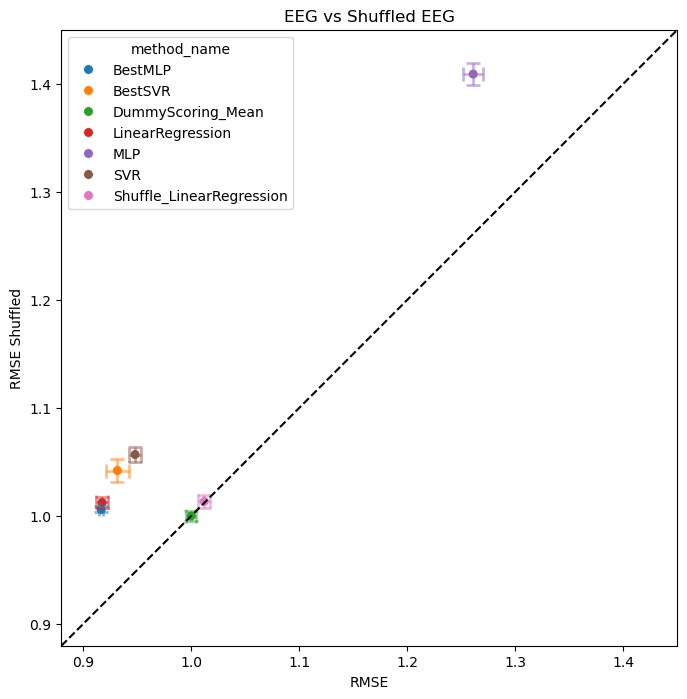

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

ax = sns.scatterplot(data=compiled_result, x="target_raw_score_mean", y="target_shuffled_score_mean", hue="method_name", s=50)

# Get the color palette used by seaborn
palette = sns.color_palette()
color_dict = dict(zip(compiled_result['method_name'].unique(), palette))

# Add error bars with matching colors
for method in compiled_result['method_name'].unique():
    method_data = compiled_result[compiled_result['method_name'] == method]
    ax.errorbar(method_data['target_raw_score_mean'], method_data['target_shuffled_score_mean'],
                xerr=method_data['target_raw_score_std'], yerr=method_data['target_shuffled_score_std'],
                fmt='none', ecolor=color_dict[method], alpha=0.5, elinewidth=2, capsize=5, capthick=2)

bounds = [0.88, 1.45]
plt.plot(bounds, bounds, c='k', linestyle='--')


ax.set_xlabel('RMSE')
ax.set_ylabel('RMSE Shuffled')
ax.set_title('EEG vs Shuffled EEG')

plt.xlim(bounds)
plt.ylim(bounds)
plt.gca().set_aspect('equal')

# Save as high-definition
fbasename = "aligned_vs_shuffled"
plt.gcf().savefig(f'{fbasename}.png', format='png', dpi=300, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.svg', format='svg', dpi=1200, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


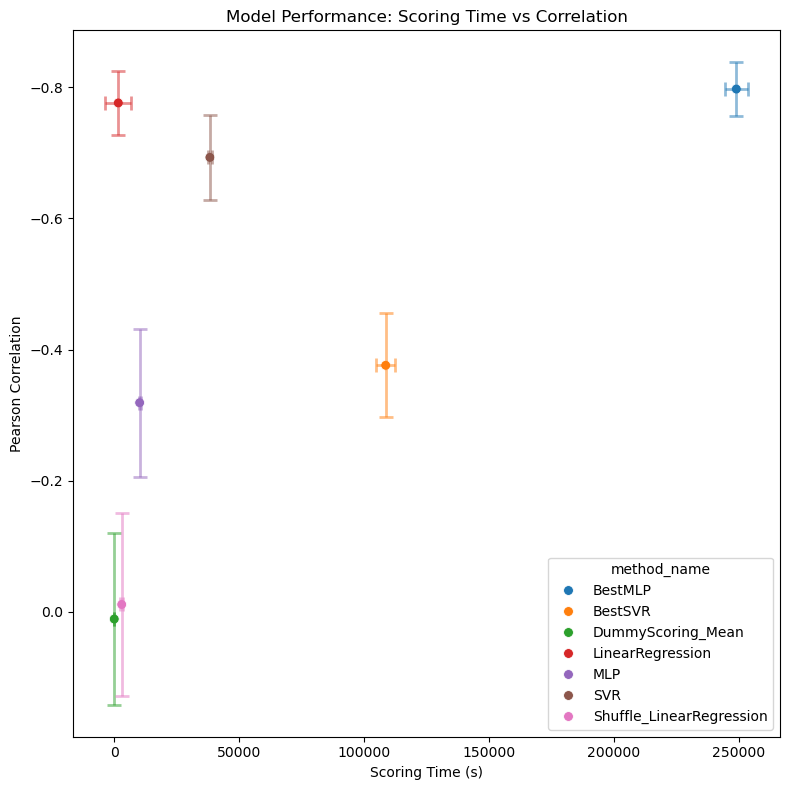

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

# Create the scatter plot
ax = sns.scatterplot(data=compiled_result, x="fit_time_mean", y="pearsonr_statistic_mean", hue="method_name", s=50)

# Get the color palette used by seaborn
palette = sns.color_palette()
color_dict = dict(zip(compiled_result['method_name'].unique(), palette))

# Add error bars with matching colors
for method in compiled_result['method_name'].unique():
    method_data = compiled_result[compiled_result['method_name'] == method]
    ax.errorbar(method_data['fit_time_mean'], method_data['pearsonr_statistic_mean'],
                xerr=method_data['fit_time_std'], yerr=method_data['pearsonr_statistic_std'],
                fmt='none', ecolor=color_dict[method], alpha=0.5, elinewidth=2, capsize=5, capthick=2)

# Set x-axis to log scale
# ax.set_xscale('log')

# Define custom formatter function
# def time_formatter(x, pos):
#     if x < 60:
#         return f"{x:.0f}s"
#     elif x < 3600:
#         return f"{x/60:.0f}m"
#     else:
#         return f"{x/3600:.0f}h"

# # Apply custom formatter to x-axis
# ax.xaxis.set_major_formatter(FuncFormatter(time_formatter))

# # Set x-axis ticks
# ax.set_xticks([1, 60, 3600, 86400])  # 1 second, 1 minute, 1 hour, 1 day

# # Adjust x-axis limits if needed
# min_time = compiled_result['fit_time_mean'].min()
# max_time = compiled_result['fit_time_mean'].max()
# ax.set_xlim(min_time / 2, max_time * 2)  # Adjust as needed

# # Set labels and title
ax.set_xlabel('Scoring Time (s)')
ax.set_ylabel('Pearson Correlation')
ax.set_title('Model Performance: Scoring Time vs Correlation')

plt.tight_layout()

plt.gca().invert_yaxis()

# Save as high-definition
fbasename = "time_vs_pearson"
plt.gcf().savefig(f'{fbasename}.png', format='png', dpi=300, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.svg', format='svg', dpi=1200, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


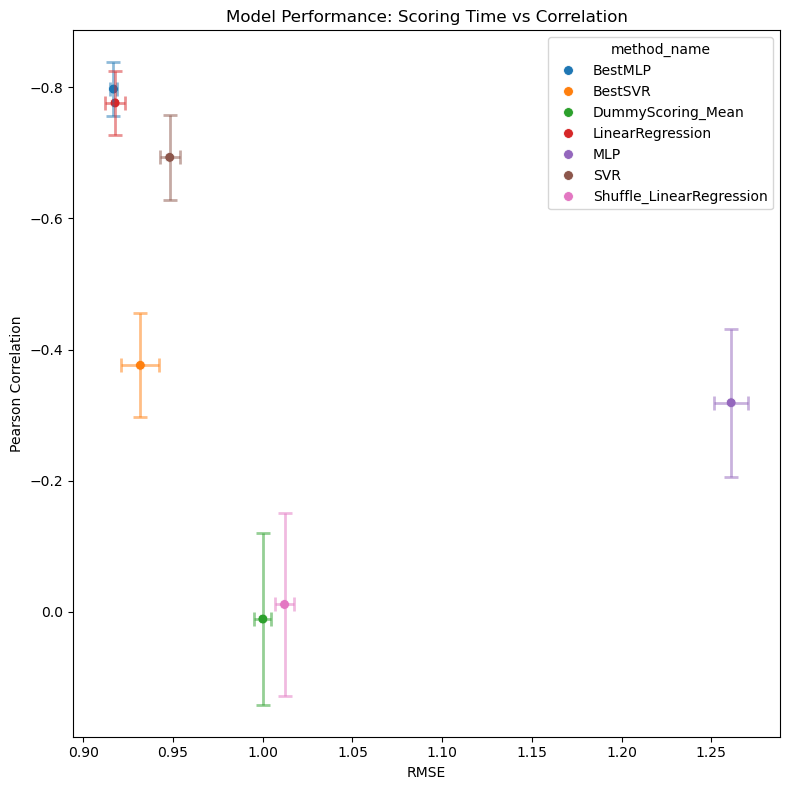

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

# Create the scatter plot
ax = sns.scatterplot(data=compiled_result, x="target_raw_score_mean", y="pearsonr_statistic_mean", hue="method_name", s=50)

# Get the color palette used by seaborn
palette = sns.color_palette()
color_dict = dict(zip(compiled_result['method_name'].unique(), palette))

# Add error bars with matching colors
for method in compiled_result['method_name'].unique():
    method_data = compiled_result[compiled_result['method_name'] == method]
    ax.errorbar(method_data['target_raw_score_mean'], method_data['pearsonr_statistic_mean'],
                xerr=method_data['target_raw_score_std'], yerr=method_data['pearsonr_statistic_std'],
                fmt='none', ecolor=color_dict[method], alpha=0.5, elinewidth=2, capsize=5, capthick=2)

# # Set labels and title
ax.set_xlabel('RMSE')
ax.set_ylabel('Pearson Correlation')
ax.set_title('Model Performance: Scoring Time vs Correlation')

plt.tight_layout()

plt.gca().invert_yaxis()

# Save as high-definition
plotconfig.save_fig("rmse_target_vs_pearson")